<p><h2 style="color:black">First things first</h2><p>
I am going explore the data-set to see what interesting features i can target in this first analysis. I will be using this notebook as a "sand-box". This process will give me an idea of what functions i need to create in order to manipulate my data-set.</p>
<h6 style="color:green">
    Lets start by importing the dataset. This data-set was scraped from <a href="http://ufcstats.com">http://www.ufcstats.com</a> using the <a style="color:red">ufc_extraction.py</a> script in this project. This script scrapes fighter statistics and stores them in a <a style="color:red"> .json</a> file. 

In [1]:
from src.data.dataMakers import dataMakers
dm = dataMakers()
fighterFrame = dm.make()
fighterFrame.head()

,dob,draws,height,losses,name,reach,sapm,slpm,stance,stracc,strdef,subavg,tdacc,tdavg,tddef,url,weight,wins
0,7-13-1978,3,NaN,0,Tom Aaron,NaN,0.00,0.00,None,0.0,0.0,0.0,0.0,0.00,0.0,http://ufcstats.com/fighter-details/93fe7332d1...,155.0,5
1,7-03-1983,6,5.92,0,Danny Abbadi,NaN,4.41,3.29,Orthodox,38.0,57.0,0.0,0.0,0.00,77.0,http://ufcstats.com/fighter-details/15df64c02b...,155.0,4
2,None,14,6.00,0,David Abbott,NaN,3.55,1.35,Switch,30.0,38.0,0.0,33.0,1.07,66.0,http://ufcstats.com/fighter-details/b361180739...,265.0,10
3,9-02-1981,4,6.25,0,Shamil Abdurakhimov,76.0,2.36,2.64,Orthodox,44.0,60.0,0.2,24.0,1.34,66.0,http://ufcstats.com/fighter-details/2f5cbecbbe...,235.0,20
4,None,14,5.50,0,Hiroyuki Abe,NaN,3.11,1.71,Orthodox,36.0,63.0,0.0,0.0,0.00,33.0,http://ufcstats.com/fighter-details/c0ed7b2081...,145.0,8


<h6 style="color:green">Great! we can print out the fighters which means the <a style="color:red">make()</a> function from the <a style="color:red">make_dataset</a> class is running smoothly. All this function does is extract the data from the  <a style="color:red">fighters.json</a> file.

In [2]:
fighterFrame.shape

(3323, 18)

<h6 style="color:green">
    We can see that the dataset is not absurdly large. This dataset contains 3323 fighters and 18 attributes.
    we can use a simple <a style="color:red"> Pandas DataFrame </a> to manipulate the dataset.
</h6>

<h2 style="color:black">
There's one problem! the extracted data is missing a 'sex' attribute. 
</h2>
<h6 style="color:green">
Stratifying the sample by sex is essential because the two sexes never fight against each other. It would not be appropiate to analyze the data without stratifying by sex if our goal is to predict the winner of a UFC match. This sounds alot like a machine learning problem. Let the clustering begin!
</h6>

<h2 style="color:black">
    First question: how does the distribution of fighters's weight division look like?
</h2>
<ul>
    <li>Flyweight: 115-125 lbs</li>
    <li>Bantamweight: 125-135 lbs</li>
    <li>Featherweight: 135-145 lbs</li>
    <li>Lightweight 145-155 lbs</li>
    <li>Welterweight 155-170 lbs</li>
    <li>Middleweight: 170-185 lbs</li>
    <li>Light Heavyweight: 185-205 lbs</li>
    <li>Heavyweight: 205-265 lbs</li>
</ul>

<h6 style="color:green">Before we start the analysis, we need to aggregate a "division" attribute to the original <a style="color:red"> FighterFrame</a>. The "division" attribute will allow us to easily stratify the dataset. </h6>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
#Aggregating an extra column that stores the division of each fighter.
conditions = [
    (fighterFrame['weight'] >= 115)&(fighterFrame['weight'] < 125),
    (fighterFrame['weight'] >= 125)&(fighterFrame['weight'] < 135),
    (fighterFrame['weight'] >= 135)&(fighterFrame['weight'] < 145),
    (fighterFrame['weight'] >= 145)&(fighterFrame['weight'] < 155),
    (fighterFrame['weight'] >= 155)&(fighterFrame['weight'] < 170),
    (fighterFrame['weight'] >= 170)&(fighterFrame['weight'] < 185),
    (fighterFrame['weight'] >= 185)&(fighterFrame['weight'] < 205),
    (fighterFrame['weight'] >= 205)&(fighterFrame['weight'] < 265)]

choices = ['fly','bantam','feather','light','welter','middle','light-heavy','heavy']
fighterFrame['division'] = np.select(conditions,choices,default=None)

In [4]:
#Stratify the DataFrame by weight division.
flyWeights = fighterFrame[fighterFrame.division == 'fly']
bantamWeights = fighterFrame[fighterFrame.division == 'bantam']
featherWeights = fighterFrame[fighterFrame.division == 'feather']
lightWeights = fighterFrame[fighterFrame.division == 'light']
welterWeights = fighterFrame[fighterFrame.division == 'welter']
middleWeights = fighterFrame[fighterFrame.division == 'middle']
lightheavyWeights = fighterFrame[fighterFrame.division == 'light-heavy']
heavyWeights = fighterFrame[fighterFrame.division == 'heavy']

<h6 style="color:green">
    It will help if i graph both; the frequency and relative frequency of each fighting class. This will give me the ability to explore the data from different perspectives and consequently allows me to ask different questions about the same set. The frequency plot provides information on the size of each division and the relative frequency provides us with a proportion. 
</h6>



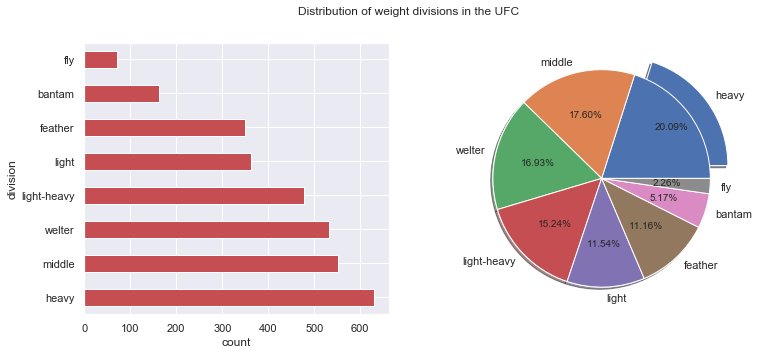

In [5]:
#setting up figure configuration
fig1, axes1 = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
fig1.suptitle('Distribution of weight divisions in the UFC')
axes1[0].set_ylabel('division')
axes1[0].set_xlabel('count')

#plotting
fighterFrame.division.value_counts().plot.barh(color="r", ax=axes1[0])

fighterFrame.division.value_counts(normalize=True,dropna=True)\
.plot.pie(shadow=True,explode=[.2,0,0,0,0,0,0,0],ax=axes1[1],autopct='%.2f%%')
axes1[1].set_ylabel('')


wedges,text = axes1[1].pie(fighterFrame['division'].value_counts(normalize=True,dropna=True))

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    

    
    


Interesting! we see that the most common weight division is welter-weight and the smallest division is fly-weight.
A generalized conclusion would be that heavier weight divisions tend to have a larger amount of fighters than lighter divisions. To quantize this statement we can do the following:

In [14]:
len(fighterFrame[fighterFrame.division == 'heavy'])/len(fighterFrame[fighterFrame.division =='fly'])


8.873239436619718

There is ~9 times more fighters in the heavy-weight division than in the fly-weight division. Thats quite a difference!

<h6 style="color:green">
    We have scratched the surface of this dataset, now lets dive in deeper.
</h6>

<h2 style="color:black">
    Second Question: How does height distribution look like? and how does it look like in each sub-division?
</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260ACA52EF0>]],
      dtype=object)

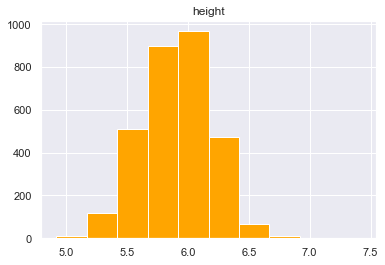

In [7]:
heightFrame =  pd.DataFrame(fighterFrame['height'])
heightFrame.hist(bins=10,color="orange")

<h6 style="color:green">
    We can see in this 10-bin histogram that the most common heights in the UFC
    fall between 5.9 and 6.2 feet. This is interesting but too general; a better
    analysis would be to plot the height distribution of each fighting class.
</h6>
<h6 style="color:green">
    Now lets apply the same procedure to each weight division.
</h6>


C:\Anaconda3\envs\ufc_data_analysis\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\envs\ufc_data_analysis\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


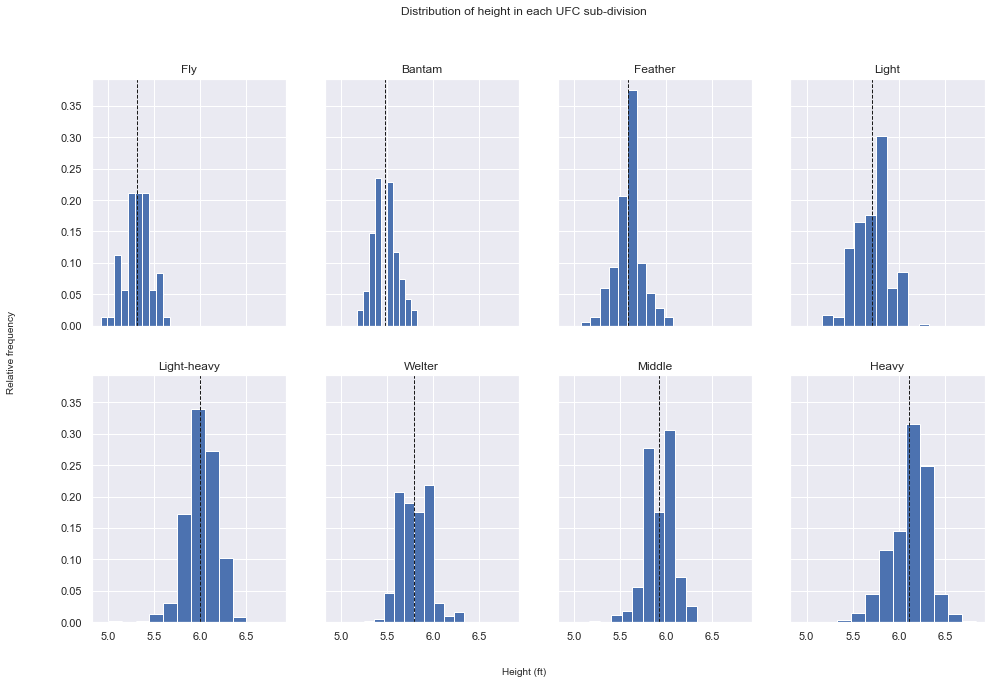

In [8]:
#figure settings
fig2, axes = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True,figsize=(16,10))
fig2.suptitle('Distribution of height in each UFC sub-division')

import pylab

def suplabel(axis,label,label_prop=None,
             labelpad=5,
             ha='center',va='center'):
    ''' Add super ylabel or xlabel to the figure
    Similar to matplotlib.suptitle
    axis       - string: "x" or "y"
    label      - string
    label_prop - keyword dictionary for Text
    labelpad   - padding from the axis (default: 5)
    ha         - horizontal alignment (default: "center")
    va         - vertical alignment (default: "center")
    '''
    fig = pylab.gcf()
    xmin = []
    ymin = []
    for ax in fig.axes:
        xmin.append(ax.get_position().xmin)
        ymin.append(ax.get_position().ymin)
    xmin,ymin = min(xmin),min(ymin)
    dpi = fig.dpi
    if axis.lower() == "y":
        rotation=90.
        x = xmin-float(labelpad)/dpi
        y = 0.5
    elif axis.lower() == 'x':
        rotation = 0.
        x = 0.5
        y = ymin - float(labelpad)/dpi
    else:
        raise Exception("Unexpected axis: x or y")
    if label_prop is None: 
        label_prop = dict()
    pylab.text(x,y,label,rotation=rotation,
               transform=fig.transFigure,
               ha=ha,va=va,
               **label_prop)

suplabel('x','Height (ft)')
suplabel('y','Relative frequency')

#plotting relative frequency
axes[0][0].hist(flyWeights['height'],weights=np.zeros_like(flyWeights['height']) + 1./len(flyWeights['height'].index))
axes[0][0].title.set_text('Fly')
axes[0][0].axvline(flyWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[0][1].hist(bantamWeights['height'],weights=np.zeros_like(bantamWeights['height']) + 1./len(bantamWeights['height'].index))
axes[0][1].title.set_text('Bantam')
axes[0][1].axvline(bantamWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[0][2].hist(featherWeights['height'],weights=np.zeros_like(featherWeights['height']) + 1./len(featherWeights['height'].index))
axes[0][2].title.set_text('Feather')
axes[0][2].axvline(featherWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[0][3].hist(lightWeights['height'],weights=np.zeros_like(lightWeights['height']) + 1./len(lightWeights['height'].index))
axes[0][3].title.set_text('Light')
axes[0][3].axvline(lightWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[1][0].hist(lightheavyWeights['height'],weights=np.zeros_like(lightheavyWeights['height']) + 1./len(lightheavyWeights['height'].index))
axes[1][0].title.set_text('Light-heavy')
axes[1][0].axvline(lightheavyWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[1][1].hist(welterWeights['height'],weights=np.zeros_like(welterWeights['height']) + 1./len(welterWeights['height'].index))
axes[1][1].title.set_text('Welter')
axes[1][1].axvline(welterWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[1][2].hist(middleWeights['height'],weights=np.zeros_like(middleWeights['height']) + 1./len(middleWeights['height'].index))
axes[1][2].title.set_text('Middle')
axes[1][2].axvline(middleWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)

axes[1][3].hist(heavyWeights['height'],weights=np.zeros_like(heavyWeights['height']) + 1./len(heavyWeights['height'].index))
axes[1][3].title.set_text('Heavy')
axes[1][3].axvline(heavyWeights['height'].mean(), color='k', linestyle='dashed', linewidth=1)


(5, 6.418782352941176)

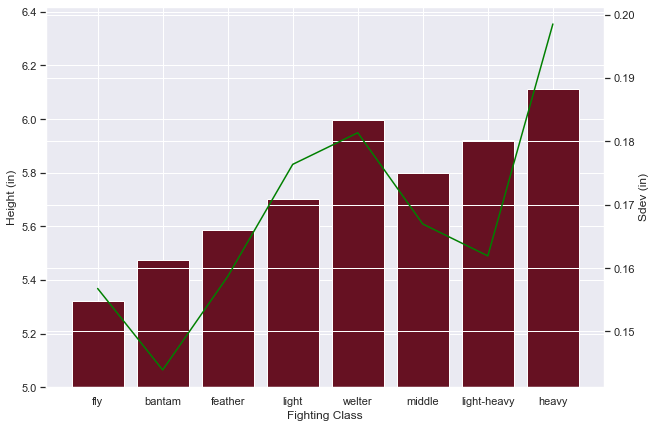

In [9]:
#figure settings
fig3, ax1 = plt.subplots(figsize=(10,7))
ax2 = ax1.twinx()

ax1.set_xlabel('Fighting Class')
ax1.set_ylabel('Height (in)')
ax2.set_ylabel('Sdev (in)')

#plotting graph
fighterSet =[flyWeights, bantamWeights, featherWeights, lightWeights, lightheavyWeights, welterWeights, middleWeights, heavyWeights]
heightMeans = []
heightStd = []

for dataset in fighterSet:
    heightMeans.append(dataset['height'].mean())
    heightStd.append(dataset['height'].std())

ax2.plot(heightStd, color="green") 
ax1.bar(choices, heightMeans,color="#661122")   
ax1.set_ylim(ymin=5)


In [10]:
new = fighterFrame[fighterFrame['name'].str.contains('Chuck')]
print(new)

             dob  draws  height  losses           name  reach  sapm  slpm  \
1110        None      8    6.50       0  Chuck Grigsby    NaN  3.29  0.71   
1682  12-17-1969      8    6.17       0  Chuck Liddell   76.0  2.71  2.97   
2169   9-22-1985      4    6.17       0   Chuck O'Neil    NaN  4.40  3.13   

        stance  stracc  strdef  subavg  tdacc  tdavg  tddef  \
1110  Orthodox    16.0    46.0     0.0    0.0   0.00   66.0   
1682  Orthodox    35.0    56.0     0.0   75.0   0.44   81.0   
2169      None    37.0    72.0     0.0    0.0   0.00    0.0   

                                                    url  weight  wins division  
1110  http://ufcstats.com/fighter-details/7fb4234670...   205.0    19    heavy  
1682  http://ufcstats.com/fighter-details/a390eb8a9b...   205.0    21    heavy  
2169  http://ufcstats.com/fighter-details/56bc9ccb60...   170.0     9   middle  
